In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/floor/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().floor(fpath='../data/floor.mat')

X.shape =  (6177, 42)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=5, max_iter0=20, to_tear=False,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'jet', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 1544 points processed...
A_k, Atilde_k: 3088 points processed...
A_k, Atilde_k: 4632 points processed...
A_k, Atilde_k: 6176 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 1544 points processed...
local_param: 3088 points processed...
local_param: 4632 points processed...
local_param: 6176 points processed...
local_param: all 6177 points processed...
After iter 1, max distortion is 42.598287
After iter 2, max distortion is 34.989784
After iter 3, max distortion is 29.195997
After iter 4, max distortion is 29.195997
After iter 5, max distortion is 29.195997
After iter 6, max distortion is 29.195997
Max local distortion = 29.19599694509226
###############
Took 27.0 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# no

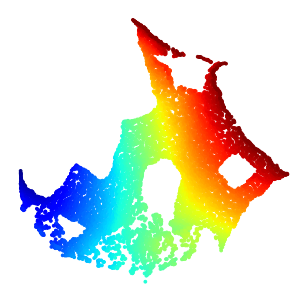

###############
Took 2.9 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.001384785001102931


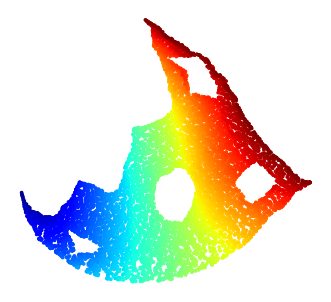

Iteration: 1
error: 0.0012137438801943603
Iteration: 2
error: 0.001123478419721533
Iteration: 3
error: 0.001068308595043543
Iteration: 4
error: 0.0010326505445586768
Iteration: 5
error: 0.0010076762435512132


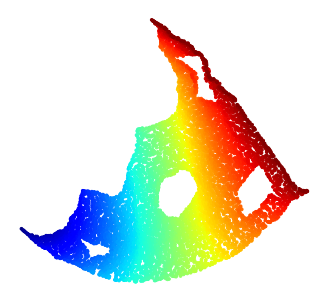

Iteration: 6
error: 0.0009919605147962662
Iteration: 7
error: 0.0009795464947261441
Iteration: 8
error: 0.0009721551320920537
Iteration: 9
error: 0.0009658224037688406
Iteration: 10
error: 0.0009619573454052716


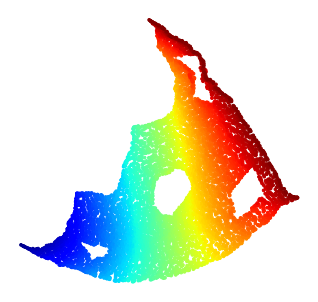

Iteration: 11
error: 0.0009577652647873917
Iteration: 12
error: 0.0009548635423903667
Iteration: 13
error: 0.0009527148772230777
Iteration: 14
error: 0.0009507278202444417
Iteration: 15
error: 0.000948616321929209


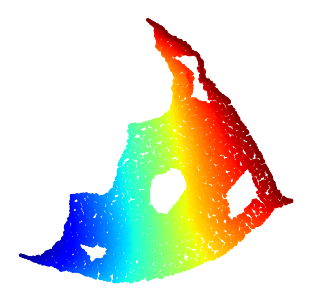

Iteration: 16
error: 0.000946904079903897
Iteration: 17
error: 0.0009452739691142195
Iteration: 18
error: 0.0009434194023586767
Iteration: 19
error: 0.0009417203915752621


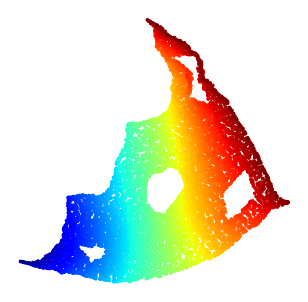

###############
Took 252.6 seconds to refine global embedding.
###############
###############
Took 257.0 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

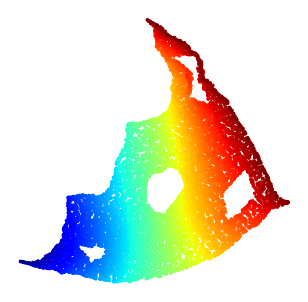

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,0], 'jet', title='LDLE0')

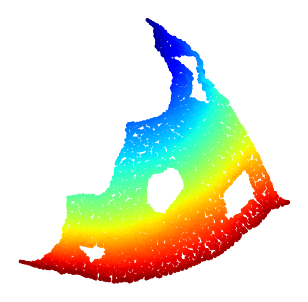

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final, labelsMat[:,1], 'jet', title='LDLE1')

# LTSA

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


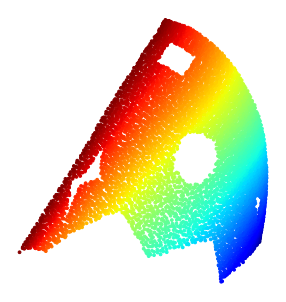

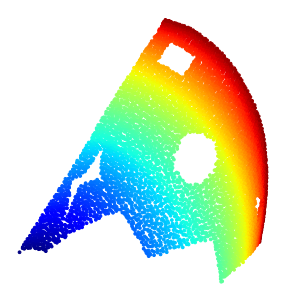

10


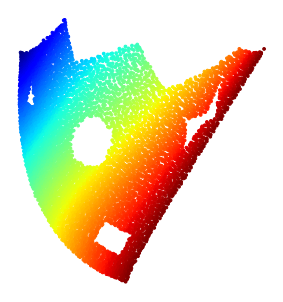

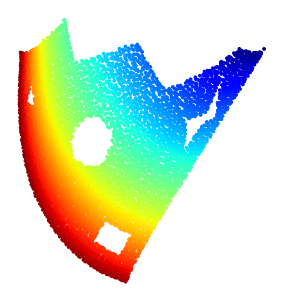

25


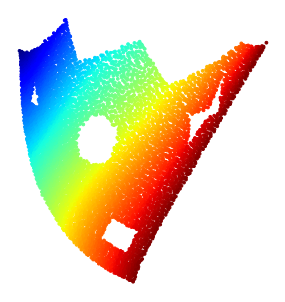

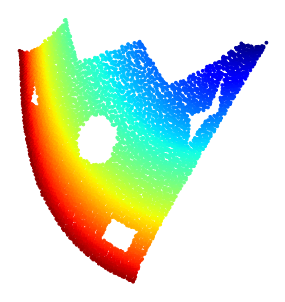

15


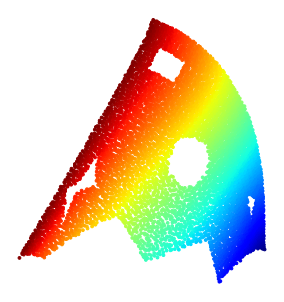

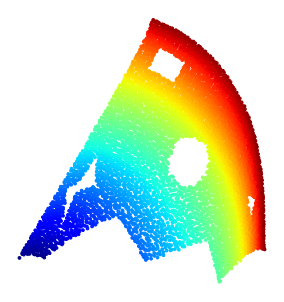

75


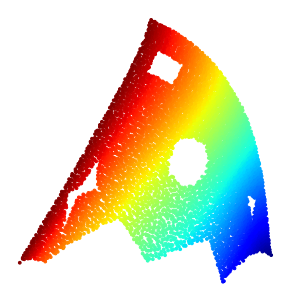

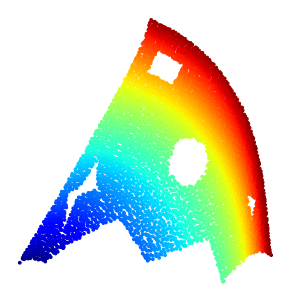

100


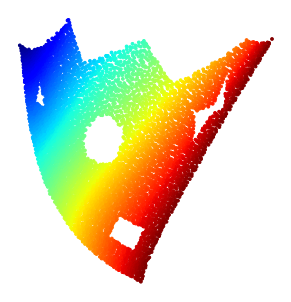

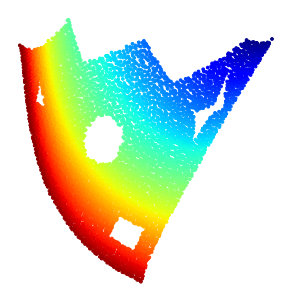

In [11]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


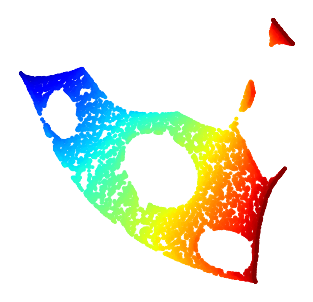

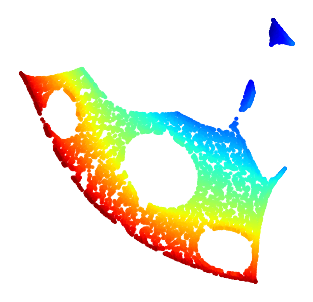

25 0.1


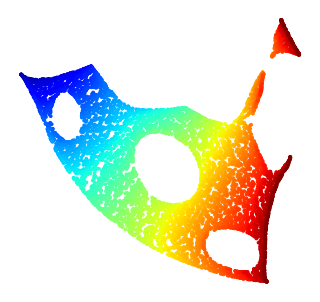

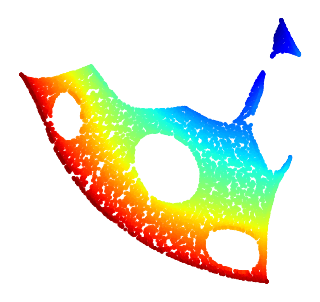

25 0.25


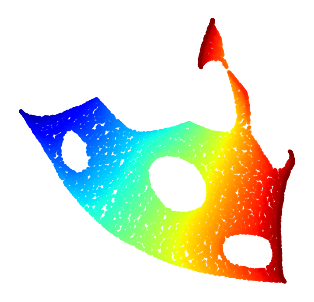

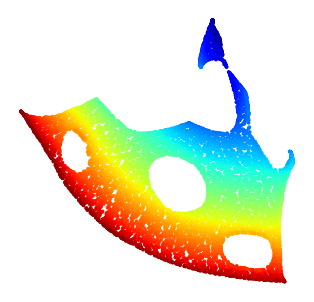

25 0.5


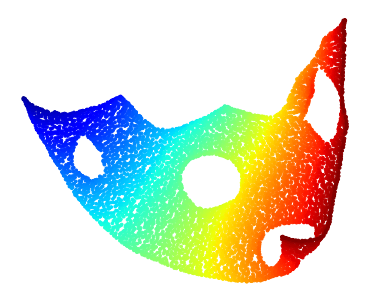

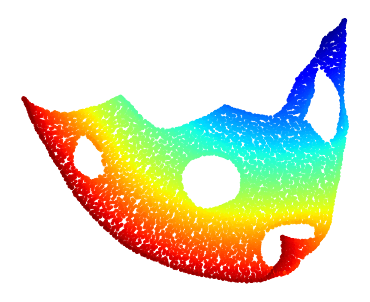

50 0.01


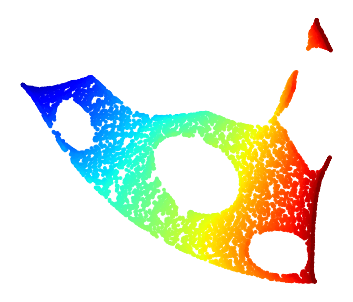

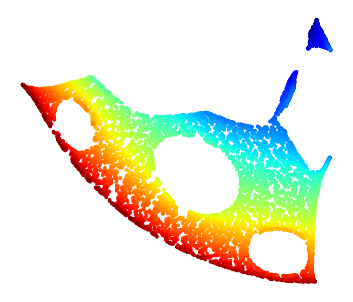

50 0.1


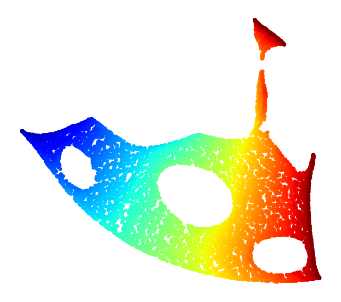

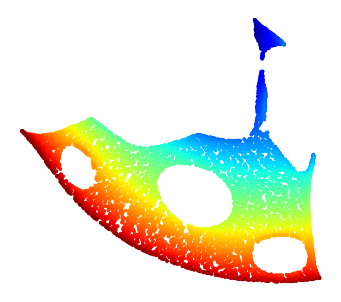

50 0.25


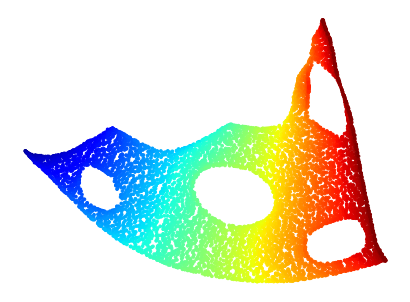

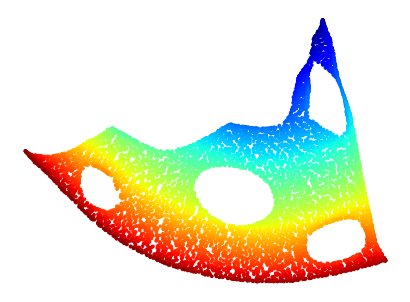

50 0.5


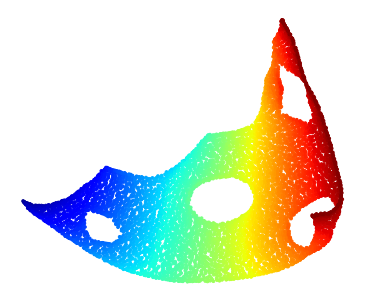

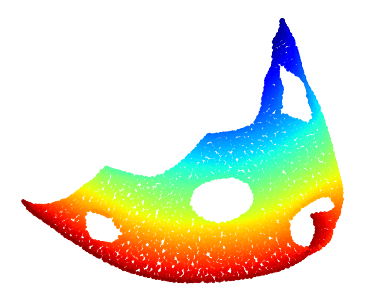

100 0.01


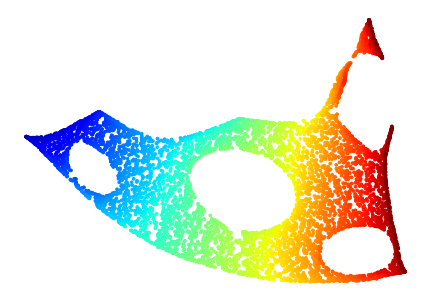

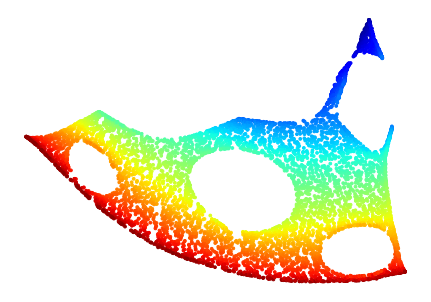

100 0.1


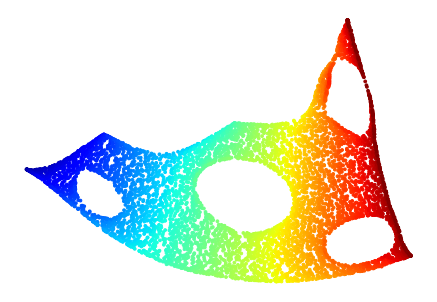

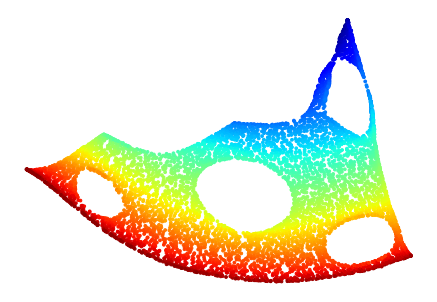

100 0.25


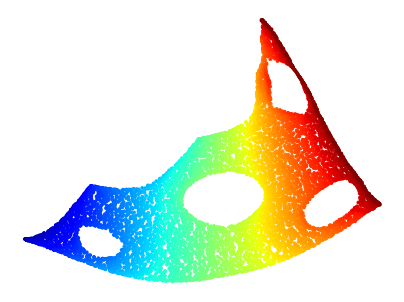

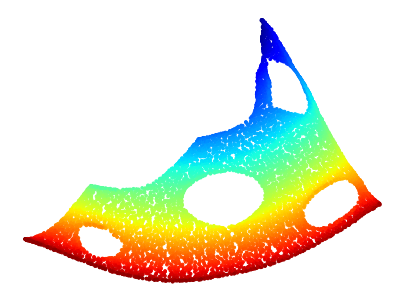

100 0.5


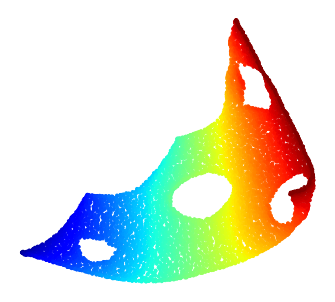

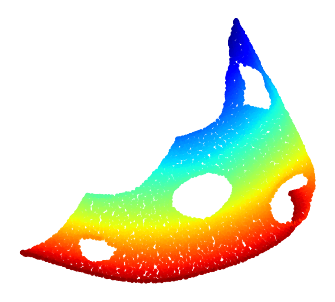

200 0.01


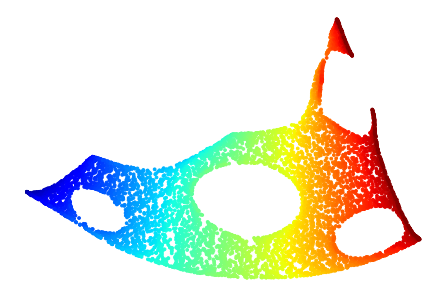

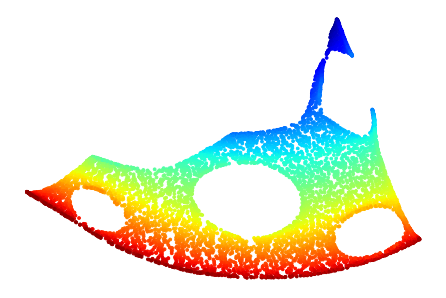

200 0.1


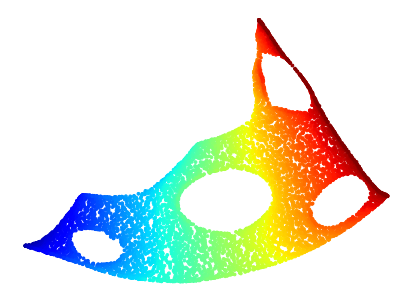

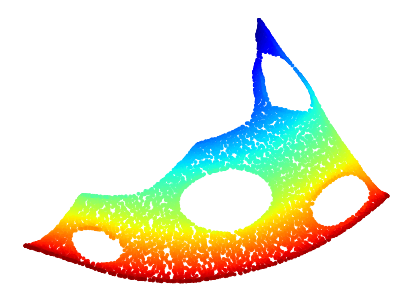

200 0.25


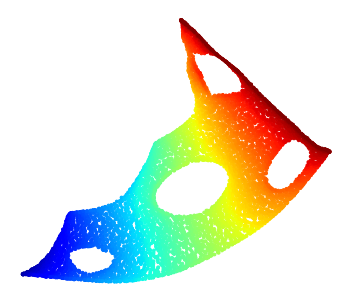

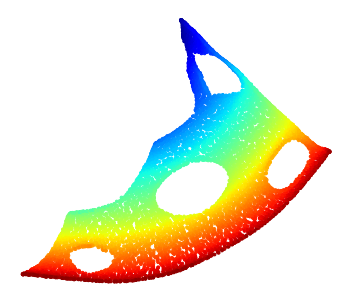

200 0.5


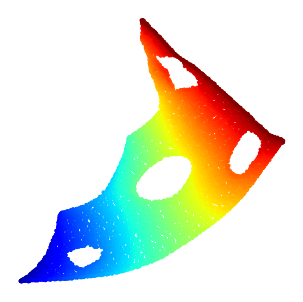

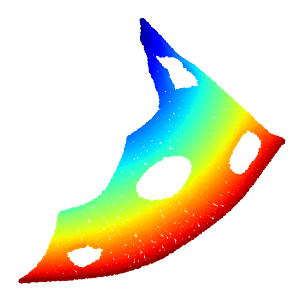

In [13]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [14]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


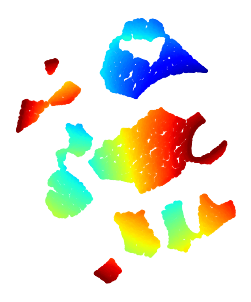

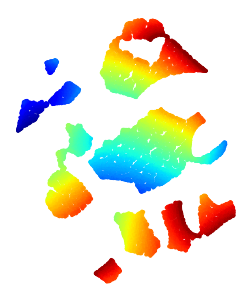

30 4


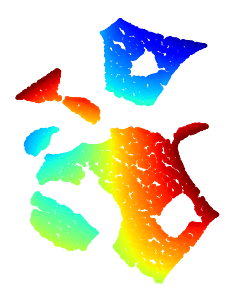

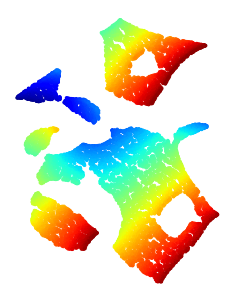

30 6


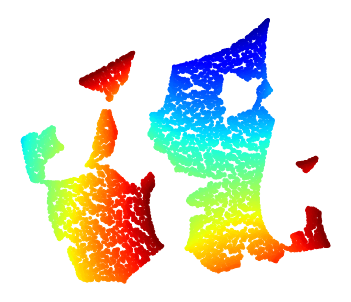

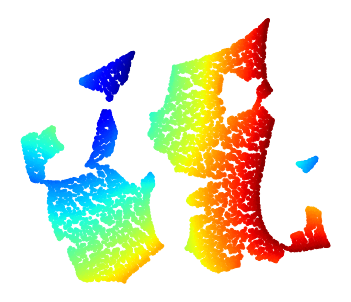

40 2


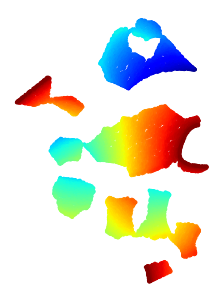

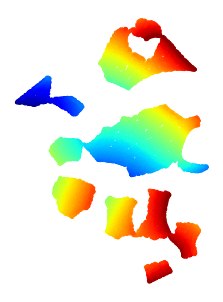

40 4


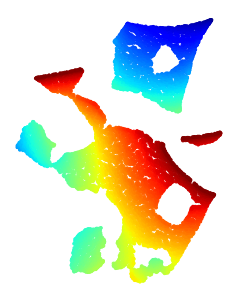

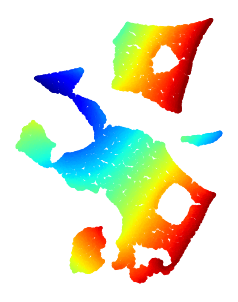

40 6


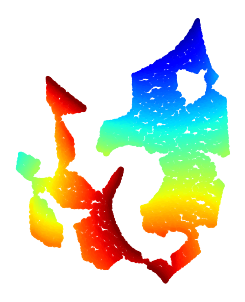

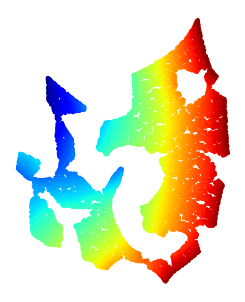

50 2


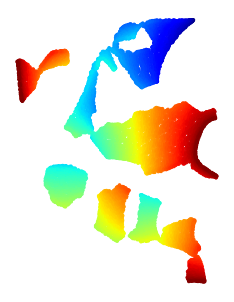

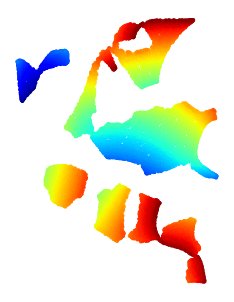

50 4


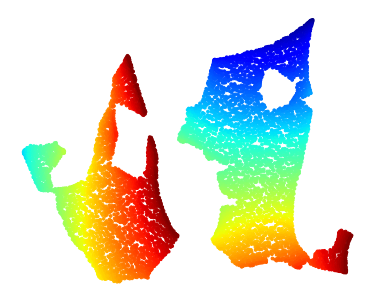

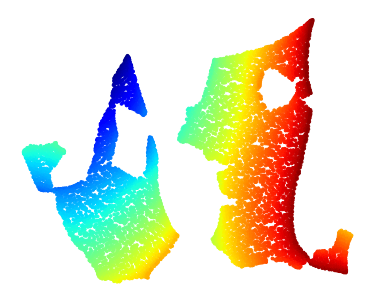

50 6


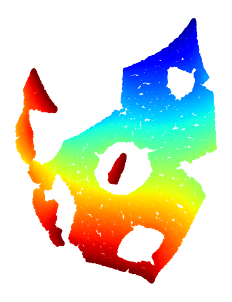

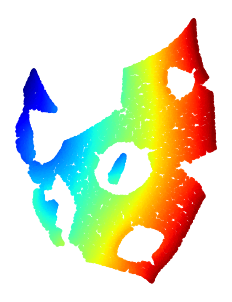

60 2


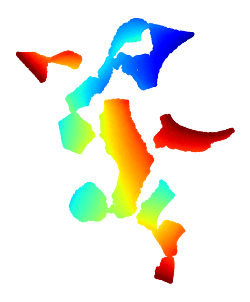

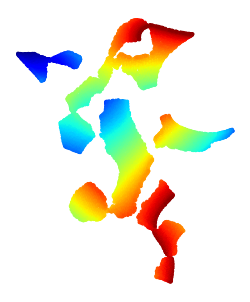

60 4


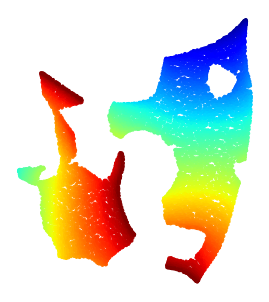

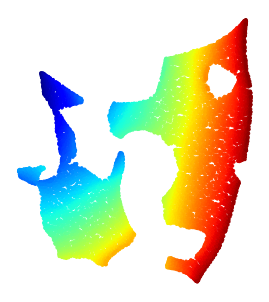

60 6


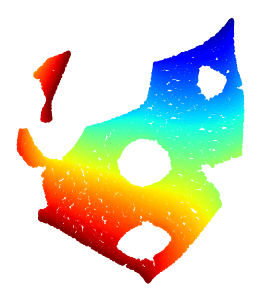

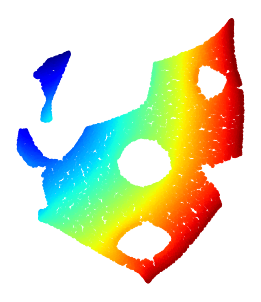

In [15]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()